# 2022  COSE361 실습 2차시- search

<과제 제출방법>

1.   제목 끝에 학번과 이름을 추가합니다. 예시) 인공지능_2차시_20XXXXXXXX_이름
2.   주피터노트북의 모든 코드가 오류없이 돌아가도록 실습 활동을 완료합니다.
3.   모든 셀이 출력되있는 상태로 제출합니다

** 주의사항
- 본 노트북과 같은 폴더안에 Nqueens.py, Utils.py 가 있어야합니다.
- 본 실습은 파이썬 3.8 이상을 요구합니다.

----------------------------------------------------------------------------------------------------------------------------
# N-Queens Problem and Local Search

인공지능 실습 2차시에서는 NQueen 문제를 다양한 local search 알고리즘들을 활용하여 해결해보겠습니다. 실습은 다음과 같이 진행되겠습니다.

1. NQueen문제
2. Local search algorithms
    - Hill climbing 
    - Genetic algorithm
3. 실습과제
    - Simulated annealing
    - Beam search

# 1. NQueen 문제

n-Queens 문제는 n개의 여왕말을 nxn 체스판에 서로 위협하지 않도록 배치하는 문제로서, 여덟 퀸 문제를 일반화한 알고리즘 문제입니다. 
여덟 퀸 문제는 1848년 막스 베첼이 처음으로 제안한 퍼즐 문제로, 수학과 컴퓨터 과학에서 알고리즘 문제로 많이 거론됩니다. 8x8 체스판에 8개의 퀸을 배치하는데, 이 때 어떤 퀸도 다른 퀸을 위협해서는 안된다는 조건이 있습니다. 퀸은 상하좌우, 대각선 4방향으로 거리 제한 없이 이동할 수 있습니다. 결국 서로의 퀸이 움직이는 경로에 다른 퀸이 있어서는 안 된다는 뜻입니다. 
일반화된 n-Queens 문제에 대한 해법으로는, n이 2, 3인 경우를 제외하고 모든 자연수에서 해를 찾을 수 있습니다.

![NQueen board](https://upload.wikimedia.org/wikipedia/commons/1/1f/Eight-queens-animation.gif)

In [ ]:
#필요한 라이브러리들을 import합니다.
from NQueens import * 
from Utils import *
import random
import math

In [ ]:
# random한 4x4 Queens board를 출력해봅시다.(미리 제공된 NQueens.py의 NQueens class를 가져옵니다)
qBoard = NQueens(4)
print(qBoard)

4x4 Queens board가 출력되고, 랜덤한 위치에 4개의 queen들이 배치되어있는 것을 확인할 수 있습니다. 출력된 board 밑에는 
    
    <<Value = () outof 6.0>>  
가 출력되는데 이때 Value는 서로 attack 하지 않는 queen들의 pair입니다. 4-queen문제에서, 서로 attack하지 않는 queen들의 최대 pair은 6이되는 것이고, 출력된 random한 board의 value값은 ()값이 되는 것입니다. 
아래 이미지를 보며 이해해보도록 합시다.


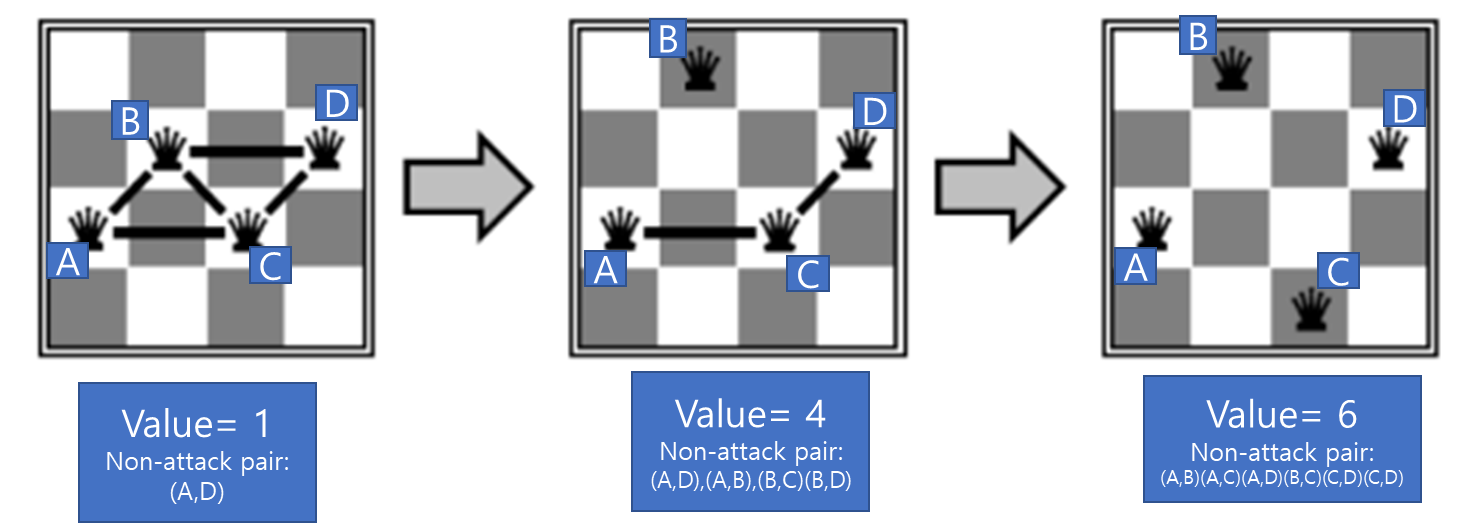


위의 이미지는 4queen이 진행되는 모습을 시각화 한 것입니다. Nqueen문제는 상하좌우 대각선으로 이동 할 수 있다는 규칙이 있고, 이에 따라 서로 attack할 수 있는 queen의 pair가 없을때 최적화가 되는 문제입니다.
위의 이미지에서 볼 수 있듯, 4개의 각 queen을 a,b,c,d라고 했을때, 서로 공격 가능한 queen들의 pair를 (a,b)(c,d)(a,c)(a,d)(b,c)(b,d)라 할 수 있고, 최대의 attack가능한,가능하지 않은 queen들의 pair들이 총합이 총 6이 되는 겁니다.

제일 왼쪽, value가 1인 그림에서는, A와 D가 서로 attack할 수 없는 것을 확인 할 수 있습니다. 그렇기 때문에, 서로 non-attack하는 queen들의 pair의 수를 나타내는 value값이 1이 되는 것입니다. 제일 오른쪽 value가 6인 그림은 서로 attack가능한 pair가 없으므로, 최적의 결과임을 알 수 있습니다. 
즉 value의 값이 클수록 nqueen이 이길 확률이 높음을 의미합니다.

이해가 되었다면 이제 NQueen.py에서 제공된 method들을 탐색해볼까요? 탐색하는 method들은 아래 local search알고리즘을 사용하여 nqueen문제를 풀때 사용됩니다.




random하게 정의된 qBoard의 이웃들은 어떻게 출력할까요? 이때는 NQueens.py의 method중 하나인 allNeighbors를 사용합니다.

In [ ]:
#qBoard의 모든 neighbor들을 출력해봅시다
neighbors = qBoard.allNeighbors()
for neigh in neighbors:
    print(neigh)

qBoard의 모든 neighbor들이 출력되는 것을 확인 할 수 있습니다.
이제 2개의 random한 neighbors를 출력해봅시다.

In [ ]:
#randomNeighbors(출력하고자 하는 neighbor의 갯수)
rand_neighbors = qBoard.randomNeighbors(2)
for neigh in rand_neighbors:
    print(neigh)

makeRandomMove()를 사용하여 random하게 queen들을 움직여볼까요?

In [ ]:
# todo: makeRandomMove
qBoard_rm = qBoard.makeRandomMove()
print('============Original qBoard===========')
print(qBoard)
print('===========After random move=======')
print(qBoard_rm)

#queen이 움직인 것을 확인 할 수 있습니다.

유전 알고리즘에서 사용되는, crossover기능도 확인해보도록 합시다.
NQueen문제에서의 crossover은 아래 그림과 같이 형상화 할 수 있습니다.

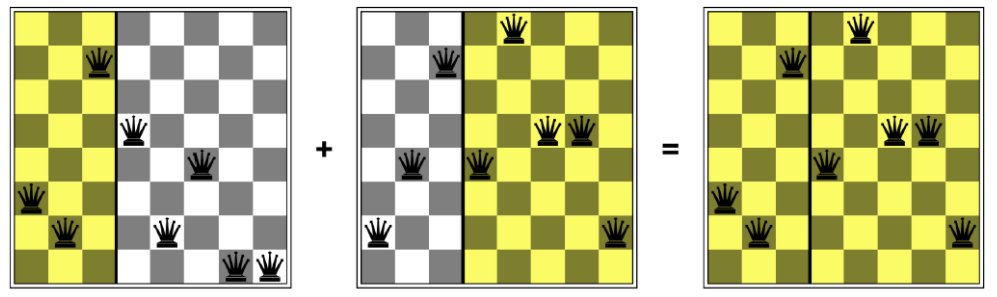

In [ ]:
#crossover
#4x4크기의 qBoard2를 출력해봅시다 
qBoard2 = NQueens(4)
print(qBoard2)
print('==========qBoard2==========')
print(qBoard)
print('==========qBoard==========')
#후에, 위에서 정의해놓은 qBoard와 qBoard2를 crossover해봅시다.
#두개의 값이 return되는데, 두 board가 cross over된 모습을 볼 수 있습니다.
qBoard_c, qBoard2_c = qBoard.crossover(qBoard2)
print('==========crossover 결과============')
print(qBoard_c)
print(qBoard2_c)

다른 method들도 알아볼까요?

In [ ]:
#heuristic함수의 board score를 출력해주는 method
print("heuristic score: ",qBoard.heuristic())

# heuristic method와 마찬가지로 현 qBoard의 value값을 출력해줍니다.
print("qboard의 value :",qBoard.getValue())

# qBoard에서 가질 수 있는 최대의 value값을 출력합니다.
# 4x4 board의 경우 6을 갖게 되고, 8x8 value의 경우 다른 value를 출력합니다.
print("qboard 최대의 value",qBoard.getMaxValue())

# 2. Local search algorithms

이제 NQueen문제를 해결하기위한 local search알고리즘들을 구현해봅시다.
본 실습에서는 4지의 local search알고리즘을 구현하게 됩니다.
       
       1. Hill climbing
       2. Genetic algorithms
       3. Simulated Annealing
       4. Local Beam search
       
       
이중, hill climbing과 genetic 알고리즘만 같이 구현해보고, 나머지 두 알고리즘은 실습과제로 스스로 구현해보게 됩니다.

## 1. Hill climbing

hill climbing 기법은 DFS(depth-first search)를 기초로하여 heuristic을 적용한 탐색 기법으로 현재 상태와 자식 노드와의 거리(혹은 비용)에 따라 정렬(sort)한 후 각 단계(step)의 선택이 이전 단계의 상태보다 나은지를 평가합니다.



![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F6MSDI%2Fbtq1WiyYHYE%2FAameXEwXKpCkprAT8watnk%2Fimg.png)

아래 제공된 코드를 한줄한줄 읽어보며 이해해보도록 합시다.

In [ ]:
# ==================================================================
# This section contains an implementation of straightforward
# Hill Climbing. It requires a state class that creates objects
# that implement the following methods: getValue, getMaxValue,
# allNeighbors, randomNeighbors, and that are printable

# 여기서 verbose는 실험시 진행과정을 체크하기 위한겁니다. verbose를 False로 설정한다면, 진행과정 없이 결과만을 보게 됩니다.
def hillClimb(startState, verbose: bool, maxRounds=2000):
    """Perform the hill-climbing algorithm, starting with the given
    start state and going until a local maxima is found or the
    maximum rounds is reached"""
    curr = startState
    #현재 value를 정해줍니다
    value = curr.getValue()
    #최대 value를 지정해줍니다.
    maxValue = curr.getMaxValue()
    #알고리즘이 몇번 돌았는가를 체크해주는 count
    count = 0
    if verbose:
        print("============= START ==============")
    # maxvalue를 찾을때까지, count가 maxRound에 도달할때까지 loop
    while value < maxValue and count < maxRounds:
        if verbose:
            print("--------- Count =", count, "---------")
            print(curr)
        #current state의 neighbor들을 모두 가지고 옵니다.     
        neighs = curr.allNeighbors()
        #value가 가장 높은 neighbor를 찾습니다.
        bestNeigh = findBestNeighbor(neighs)
        #찾은 best value를 가진 neighbor의 value를 지정해줍니다.
        nextValue = bestNeigh.getValue()
        #nextValue의 값이 현 value보다 크거나 같을때, 
        if nextValue >= value:
            if verbose:
                print("-----------Best neighbor-----------:")
                print(bestNeigh)
            #curr를 bestNeigh로 저장하고 value를 netValue로 저장
            curr = bestNeigh
            value = nextValue
        else:
            break
        count += 1
    if verbose:
        print("============== FINAL STATE ==============")
        print(curr)
        print("   Number of steps =", count)
        if value == maxValue:
            print("  FOUND PERFECT SOLUTION")

    return value, maxValue, count


def findBestNeighbor(neighbors):
    """Given a list of neighbors and values, find and return a neighbor with
    the best value. If there are multiple neighbors with the same best value,
    a random one is chosen"""
    #input neighbor들의 value를 비교하며 
    startBest = neighbors[0]
    #시작 state의 value를 가지고옵니다.
    bestValue = startBest.getValue()
    #best neighbor들의 list를 만듭니다.
    bestNeighs = [startBest]
    #input인 neighbors들의 모든 neighbor들을 loop합니다.
    for neigh in neighbors:
        #neighbor의 value를 가지고옵니다.
        value = neigh.getValue()
        #이제 loop중인 neighbor의 value와 현재까지의 bestValue에 지정된 value를 비교 후, value가 더 크다면
        if value > bestValue:
            #현재 neighbor의 value를 best value로 지정해줍니다.
            bestNeighs = [neigh]
            bestValue = value
        elif value == bestValue:
            bestNeighs.append(neigh)
    #loop이 끝난 후, bestNeighs는 같은 value값을 가지는 neighbor들의 모음입니다. 그중 하나를 랜덤하게 선택하여 best neighbor로 지정후 리턴해줍니다. 
    bestNeigh = random.choice(bestNeighs)
    return bestNeigh


구현한 hill climb을 실행해봅시다. 위에 정의한 4queen인 qBoard를 가지고와서 실행하도록 해봅시다.

In [ ]:
#실행되는 내역 출력을 위해 verbose를 True로 설정해줍니다.
hillClimb(qBoard,True)

count별로 best neighbor를 출력하는것을 볼 수 있습니다.
Final state에서는 최종적으로 찾아낸 best neighbor가 출력된것을 볼 수 있습니다.

이때 optimal한 result가 나오지 않을수도 있습니다.

### hill climbing 알고리즘 case별로 test하기

이번엔 제공된 Utils.py에서 제공된 method를 사용하여 n의 size별 hill climb 알고리즘을 10번씩 반복해봅시다. 이때 사용되는 method는 testRandomStarts입니다.

>testRandomStarts(알고리즘method이름, reps= 반복할 횟수, sizeList=[실험하고 싶은 n들의 리스트])


In [ ]:
#이 method는 구현한 method이름을 받고, 한 n에 대해서 몇번을 반복하여 실험할지를 정하는 reps, 그리고 무슨 n을 가지고 실험을 할지에 대한 메소드입니다.
#한번 돌려볼까요?
testRandomStarts(hillClimb, reps=10, sizeList=[4, 6, 8])

각 board의 사이즈에 따라 출력되는 테스트들을 확인할 수 있습니다. 

    Test results for size n
        Test n : value = n out of n count = n time = n
이런 형식의 테스트 결과가 마지막에 출력되는 것을 볼 수 있습니다. 여기서 'value n1 out of n2' n1은 위에서 설명했듯, 서로 attack하지 않은 queen들의 pair수입니다. count는 우리가 인풋으로 받은 maxRounds=2000 번의 시도 중, 몇번째 만에 optimal한 결과를 찾았는가 입니다. time은 result를 낼때까지의 시간을 의미합니다. 후에 실습과제에서 이러한 실험결과를 사용하여 각 알고리즘들을 비교분석하게 됩니다. 

이제 genetic algorithm으로 넘어가봅시다.

## 2. Genetic algorithms

유전알고리즘의 핵심은 부모 상태와 비슷한 자식 상태를 만드는 것입니다. 각 상태는 문자열로 표현되며, 0과 1로 이루어진 벡터로 표현하는 것이 일반적입니다.
한 비트는 유전자(gene), 전체 벡터는 염색체(choromosome)으로 표현됩니다. 평가 함수로 fitness function이 쓰이며, 더 좋은 상태에서 더 높은 값을 가지게 됩니다. 유전 연산(선택, 교배, 돌연변이)을 이용해 다음 세대를 생산합니다. 아래 그림과 같은 flow로 진행되게 됩니다. 

![](https://static.wixstatic.com/media/a27d24_0faa81130a0140ffbeb4896b7ca5de04~mv2.jpg/v1/fill/w_881,h_501,al_c,q_90/a27d24_0faa81130a0140ffbeb4896b7ca5de04~mv2.jpg)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbpgY1C%2Fbtq3nTDVr5G%2F2YOnHjzTR4WyZQYkP0b7I1%2Fimg.png)

In [ ]:
# This section contains an implementation of genetic algorithm search. This
# algorithm randomly generates n starting points.  It then chooses n "parents"
# from the population, based on roulette-wheel selection, which is based on
# the value/fitness of each state.  Another way to put this is that it samples
# with replacement from the probability distribution that corresponds to the
# amount of fitness the individual is responsible for. It crosses over parents
# with each other to create a new generation, and then continues.

#hill climbing과 다르게 start state을 받지 않습니다. 대신, board 사이즈를 input으로 받습니다. 
#여기서는 population size(popSize)를 30으로 지정합니다.

def geneticAlg(nqueenNum, verbose:bool, popSize=30, maxGenerations=2000, crossPerc=0.8, mutePerc=0.01):
    """ Given a population size and problem size, it generates a set of random
    states of the given population size.  It then repeats until an optimal solution
    is found (dangerous chance of infinite loop here) and selects a set of parents
    using weighted roulette-wheel selection.  It then crosses the parents over to make
    a new population, and repeats."""
    # population size가 홀수일때, population size를 짝수로 만듭니다.
    if popSize % 2 == 1:  # if user puts in an odd population size, make it even
        print("Making population size even:")
        popSize += 1
        
    #생성된 population을 저장할 list
    currStates = []
    #population size만큼 random state를 생성해줍니다.
    for i in range(popSize):
        nextState = NQueens(nqueenNum) #input으로 주어진 board size의 random한 nqueen을 생성.
        currStates.append(nextState) #current state에 random하게 생성한 state를 append합니다
    #board size는 같기때문에 첫번째 maxValue를 가지고옵니다.
    maxFit = currStates[0].getMaxValue()

    if verbose:
        print("================ Initial States ================")
        printNeighbors(currStates, False)
        print("================================================")

    #loop을 몇번 돌았는가를 check
    count = 0
    #optimal을 찾았을때 loop을 멈추기 위한
    foundOptimal = False
    
    #best state를 current state의 첫번째 state로 지정합니다.
    overallBest = currStates[0]
    #만약 optimal을 찾지 못했고, count가 input으로 받은 maxGenerations 도달할때까지 loop
    while (not foundOptimal) and count < maxGenerations:
        count += 1
        if verbose:
            print("Generation", count)
            
        #currState에 저장된 population들의 value들을 fits에 저장합니다.
        fits = [state.getValue() for state in currStates]
        #모든 value들 중에 최대의 maxFit이 존재한다면,
        if maxFit in fits:  # we have an optimal solution
            #maxFits가 fits의 어디 index에 저장되어있는지 체크 후,
            pos = fits.index(maxFit)
            #bestone에 저장합니다.
            bestOne = currStates[pos]
            # optimal solution을 찾은게 됩니다.
            foundOptimal = True
        else:
            #verbose가 참이면 아래 print문들을 출력합니다.
            if verbose:
                print("Average fitness:", sum(fits) / len(fits))
                print("Max fitness:", max(fits))
                print("Min fitness:", min(fits))
            #fits의 가장 큰 index를 가지고옵니다
            bestLoc = fits.index(max(fits))
            bestOne = currStates[bestLoc]
            #아래 구현된 selectParents를 사용합니다. 우리는 roulette selection을 사용하게 됩니다.
            parentPool = selectParents(currStates, fits)
            #crossover 또는 mutation이 이루어진 parent를 currStates에 저장합니다
            currStates = mateParents(parentPool, crossPerc, mutePerc)
            if verbose:
                printNeighbors(currStates, False)
                print("==============================================")
        
        #bestOne의 value가 overall best의 value보다 크다면
        if bestOne.getValue() > overallBest.getValue():
            #overall best를 bestone으로 업데이트 해줍니다.
            overallBest = bestOne
    if verbose:
        print("============== GOAL ==============")
        print("  Last generation best one:")
        print(bestOne)
        print("  Overall best discovered:")
        print(overallBest)
        print("   Number of steps =", count)
    return bestOne.getValue(), maxFit, count

#====================================helper methods====================================

#roulette selection을 사용하게됩니다.
def selectParents(states, fitnesses):
    """given a set of states, repeatedly select parents using roulette selection"""
    parents = []
    
    for i in range(len(states)):
        #다음에 선택될 paranet의 index
        nextParentPos = rouletteSelect(fitnesses)
        parents.append(states[nextParentPos])
    #population중 roulette selection을 사용하여 parent들이 선택되게 됩니다.
    return parents

#crossoverPerc= cross over rate, mutation
def mateParents(parents, crossoverPerc, mutationPerc):
    """Given a set of parents, pair them up and cross them together to make
    new kids"""
    newPop = []
    #parent 2개씩 crossover을 진행하기위해
    for i in range(0, len(parents), 2):
        p1 = parents[i]
        p2 = parents[i + 1]
        #cross over을 할지말지를 결정하기 위한 random한 수
        doCross = random.random()
        #설정한 crossover percentage보다 작다면
        if doCross < crossoverPerc:
            #crossover을 실행해줍니다.
            n1, n2 = p1.crossover(p2)
            newPop.append(n1)
            newPop.append(n2)
        else:
            #crossover을 하지 않을시, newPop에 append합니다.
            newPop.append(p1.copyState())
            newPop.append(p2.copyState())
            
    #mutation을 해주게됩니다.
    for i in range(len(newPop)):
        nextOne = newPop[i]
        doMutate = random.random()
        if doMutate <= mutationPerc:
            #random 한 move를 하도록 합니다.
            newPop[i] = nextOne.makeRandomMove()
    return newPop

def rouletteSelect(valueList):
    """takes in a list giving the values for a set of entities. It randomly
    selects one of the positions in the list by treating the values as a kind of
    probability distribution and sampling from that distribution. Each entity gets
    a piece of a roulette wheel whose size is based on comparative value: high-value
    entities have the highest probability of being selected, but low-value entities have
    *some* probability of being selected."""
    totalValues = sum(valueList)
    pick = random.random() * totalValues
    s = 0
    for i in range(len(valueList)):
        s += valueList[i]
        if s >= pick:
            return i
    return len(valueList) - 1


def addNewRandomMove(state, stateList):
    """Generates new random moves (moving one queen within her column) until
    it finds one that is not already in the list of boards. If it finds one,
    then it adds it to the list. If it tries 100 times and doesn't find one,
    then it returns without changing the list"""
    nextNeigh = state.makeRandomMove()
    count = 0
    while alreadyIn(nextNeigh, stateList):
        nextNeigh = state.makeRandomMove()
        count += 1
        if count > 100:
            # if tried 100 times and no valid new neighbor, give up!
            return
    stateList.append(nextNeigh)


def alreadyIn(state, stateList):
    """Takes a state and a list of state, and determines whether the state
    already appears in the list of states"""
    for s in stateList:
        if state == s:
            return True
    return False


def printNeighbors(neighList, full = True):
    """Takes a list of neighbors and values, and prints them all out"""
    print("Neighbors:")
    for neigh in neighList:
        neigh.setPrintMode(full)
        print(neigh)

이제 구현한 genetic algorithm을 실행해봅시다.

In [ ]:
#4queen의 genetic 알고리즘
geneticAlg(4, True)

출력이 된 것을 보게되면, 각 generation마다의 average fitness값, max, minimum fitness값이 출력되고, 또 모든 neighbor들이 출력되는 것을 볼 수 있습니다.

하지만 여기서는 board형태가 아닌 4개의 숫자로 나타나게 되는데요, 만약 출력된 어떤 generation의 neighbor 중 
'2 3 1 2' value=3.0 out of 6.0 
라고 한다면, 이를 보드의 형태로 나타낸다면, 아래와 같을 것이다. 이는 보드의 각 행별로 queen의 위치를 나타나는 index라고 생각하면 된다. index는 0으로부터 시작하기때문에, 첫번째 행의 세번째 열에 있는 queen의 위치는 2가 되는 것이다. 

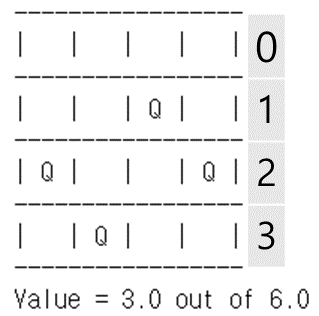

### genetic 알고리즘 case별로 test하기

이번엔 제공된 Utils.py에서 제공된 method를 사용하여 n의 size별 genetic 알고리즘을 10번씩 반복해봅시다. 이때 사용되는 method는 testVaryingPops입니다.

>testRandomStarts(알고리즘method이름, popSize= population 크기, reps= 반복할 횟수, sizeList=[실험하고 싶은 n들의 리스트])


In [ ]:
testVaryingPops(geneticAlg, popSize=10, reps=5, sizeList=[4, 6, 8])

역시 마찬가지로 사이즈별로 테스트가 진행된 것을 확인할 수 있습니다.

# 3. 실습 과제(총 40점)

본 실습과제는 크게 세가지로 이루어져있습니다.
simulated annealing과 beam search를 제공된 pseudo code를 바탕으로 구현해보고, 위에 구현해본 hill climbing과 genetic 알고리즘의 성능을 비교하는 실험을 통하여 분석하는 것입니다.


- 과제1. simulated annealing구현하기(15점)
    - 과제1-1. psudo code와 조건을 만족하는 코드 작성하기
    - 과제 1-2 verbose True로 하여 실행하기
- 과제2. beam search 구현하기(15점)
    - 과제2-1. psudo code와 조건을 만족하는 코드 작성하기
    - 과제 2-2 verbose True로 하여 실행하기
- 과제3. 구현된 4개의 local search 알고리즘들을 비교분석하기(10점)


## 과제1. simulated annealing 구현하기(15점)


### 과제 1-1. psudo code와 조건을 만족하는 코드 작성하기
아래 주어진 psudo code를 바탕으로 구현해보세요.

추가 조건)
verbose 변수가 True일 때, 함수 안에서 다음의 변수를 프린트 해야합니다.(위에 구현된 hill climbing, genetic algorithm을 참고하여 작성하세요)
- 알고리즘 시작 프린트문
- Loop 마다 현재 count와 current state
- Loop마다 찾아진 best neighbor 또는 선택된 다음 state
- loop마다 현재 temperature
- value가 더 높은 state이 찾아졌을 때, 더 낮은 state이 찾아졌을 때 모두 state 프린트
- 알고리즘 끝 프린트문
-	알고리즘의 결과로 나온 마지막 state (solution 또는 final state)
-	알고리즘이 끝났을 때의 count


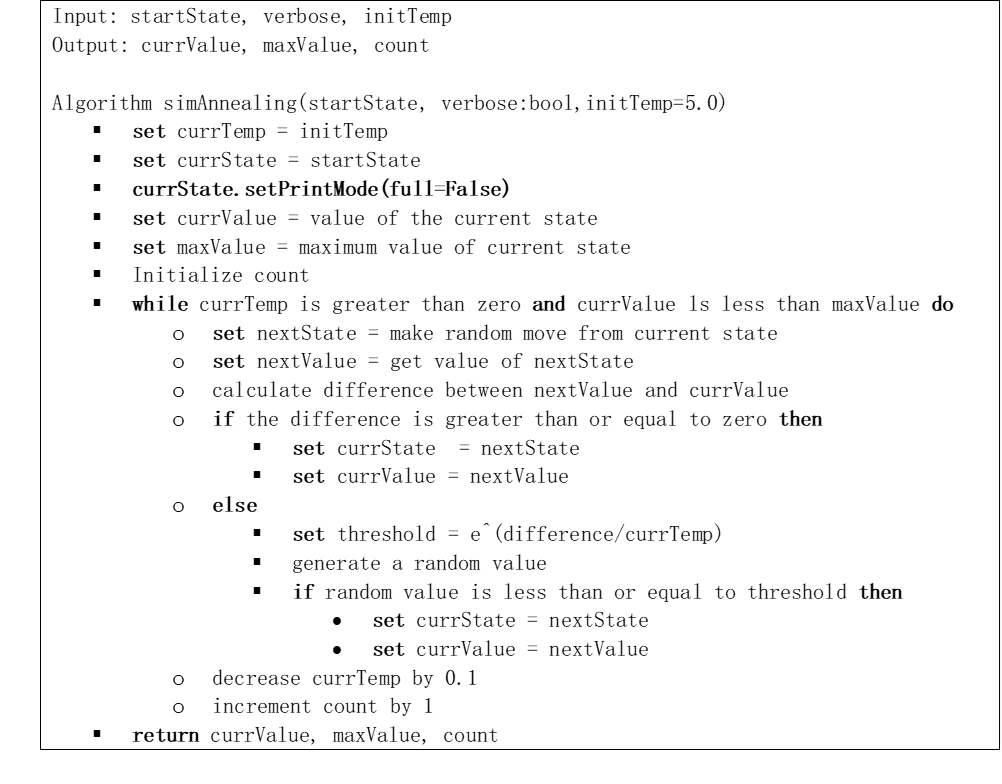

In [ ]:
# This section contains an implementation of simulated annealing.  This
# algorithm randomly generates a move from the current state.  If the randomly
# generated move is better than the current one, then it makes that move.  If
# it is worse, then it decides stochastically whether to take the move or not.
# This involves both the difference in value, and also the current temperature.
# The states involved here need to implement the same set of methods as before,
# Plus a makeRandomMove method, that returns a new state one off from the
# previous one."""

# todo: 실습과제
def simAnnealing(startState, verbose: bool,initTemp=5.0):
#===================실습과제==========================
#아래에 코드 작성하세요



    return currValue, maxValue, count


## 과제 1-2 simAnnealing을 실행하세요

verbose를 True로 설정하여 실행하세요

## 과제2. Local beam search(15점)

### 과제 2-1.  psudo code와 조건을 만족하는 코드 작성하기
아래 수도코드를 참고하여 beamSearch method를 구현해보세요.

•	Beam search는 랜덤한k states로 시작하기 때문에, startState보다 정해진 크기의 랜덤한 N-Queen state을 생성하도록 생성할 보드의 크기(queen의 개수)를 입력으로 받습니다.

•	함수 sortByValue, keepBestNNeighbors, insertState은 이미 주어졌습니다. beamSearch 함수를 구현할 때, 이 함수를 사용하기 바랍니다

추가 조건)
verbose 변수가 True일 때, 함수 안에서 다음의 변수를 프린트 해야합니다.(위에 구현된 hill climbing, genetic algorithm을 참고하여 작성하세요)
- 알고리즘 시작 프린트문
- Loop 마다 현재 count와 current state
- Loop마다 찾아진 best neighbor 또는 선택된 다음 state
- loop마다 현재 temperature
- value가 더 높은 state이 찾아졌을 때, 더 낮은 state이 찾아졌을 때 모두 state 프린트
- 알고리즘 끝 프린트문
-	알고리즘의 결과로 나온 마지막 state (solution 또는 final state)
-	알고리즘이 끝났을 때의 count


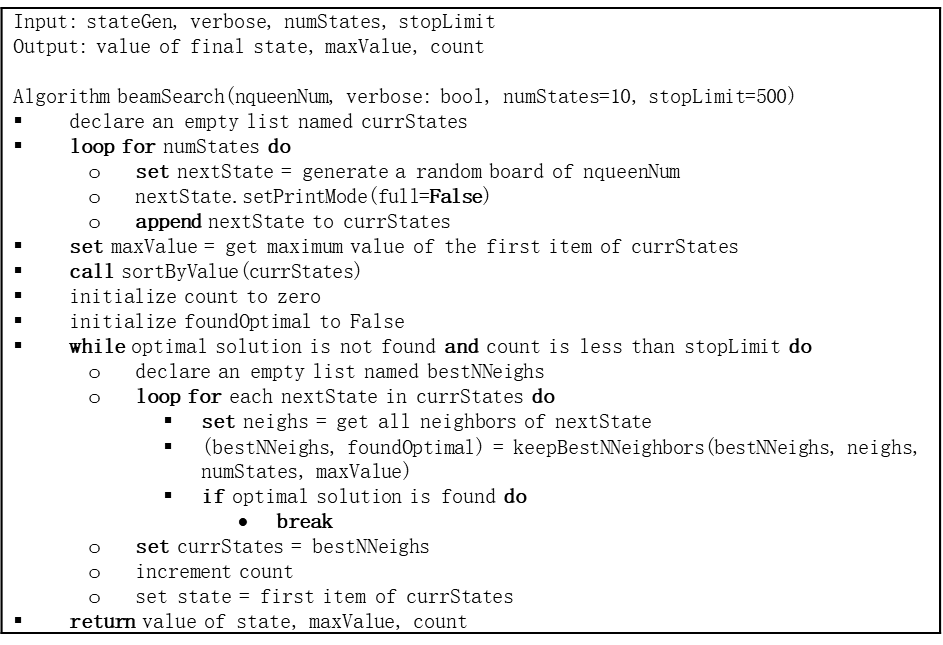

In [ ]:
def beamSearch(nqueenNum, verbose: bool, numStates = 10, stopLimit=500):

 #============================실습과제==========================


    return state.getValue(), maxValue, count


def sortByValue(stateList):
    """Takes a list of states and sorts them in ascending order by value"""
    stateList.sort(key=lambda neigh: - neigh.getValue())

def keepBestNNeighbors(bestSoFar, neighs, n, maxVal):
    """Takes in a list of all neighbors, and the number to select, and it selects
    the best n neighbors.  If one of the neighbors is optimal, then it returns
    just that neighbor, and the flag True.  If none is optimal, it returns the best
    n of them, with the flag False."""
    sortByValue(neighs)
    bestNeigh = neighs[0]
    if bestNeigh.getValue() == maxVal:  # if we have found an optimal solution
        return ([bestNeigh], True)
    else:
        i = 0
        while i < len(neighs):
            nextNeigh = neighs[i]
            if len(bestSoFar) == n:
                worstOfBest = bestSoFar[-1]
                if nextNeigh.getValue() < worstOfBest.getValue():
                    break
            insertState(bestSoFar, nextNeigh, n)
            i = i + 1
        return (bestSoFar, False)

def insertState(sortedList, newState, limit):
    """Takes in a list sorted by value, with highest values at the front, and it
    inserts the new state in the proper place. There is a length limit; if exceeded
    then the last element (the one with lowest value) is removed."""
    i = 0
    for state in sortedList:
        if newState.getValue() > state.getValue():
            break
        i = i + 1
    sortedList.insert(i, newState)
    if len(sortedList) > limit:
        sortedList.pop(-1)

## 과제 2-2 beamSearch를 실행하세요

verbose는 True로 설정하여 실행하세요

## 과제3. 비교분석하기(10점)

테스트 함수를 사용하여 알고리즘이 실행되는데 걸리는 시간을 제시하고, 이 시간과 알고리즘의 원리를 기반하여 알고리즘들의 time complexity을 자유롭게 비교 및 분석하세요.

    •	시간을 제시할때는 모든 횟수를 제시하여도 되고 평균을 제시하여도 됩니다.

    •	테스트 함수의 reps, sizeList 변수와 알고리즘의 변수(maxRounds, numNeighs, initTemp, stopLimit 등등)를 자유롭게 변경하여 실험하세요

    •	beam search와 genetic algorithm은 testVaryingPops 함수를 사용하여 테스트하고, 나머지 함수는 testRandomStarts 함수로 테스트 하세요





a.	Hill-Climbing vs Simulated Annealing

b.	Hill-Climbing vs Beam Search

c.	Genetic Algorithm vs Beam Search



 < 채점기준 >
1) 테스트 실행 결과를 서술하였으며 

2) 알고리즘의 원리/접근방법을 설명하였고 

3) 1과 2에 기반하여 각 알고리즘의 time complexity를 비교하였는가